<a href="https://colab.research.google.com/github/SongChaeRin7987/OUTTA/blob/main/%EC%86%A1%EC%B1%84%EB%A6%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC2_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

In [85]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [86]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [87]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [88]:
# 데이터 탐색

In [89]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [90]:
df.info()       # 결측값이 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [91]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [92]:
# 결측치 확인 및 처리

In [93]:
df.isnull().sum()       # 결측값이 없음

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [94]:
# 이상치 탐지 (시각화, or scaler 사용)

<Axes: >

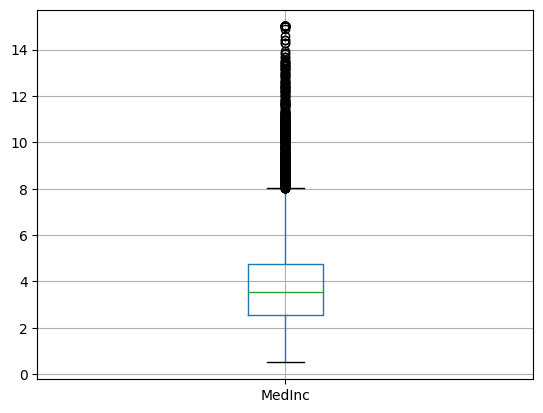

In [95]:
df.boxplot(column=["MedInc"])

<Axes: >

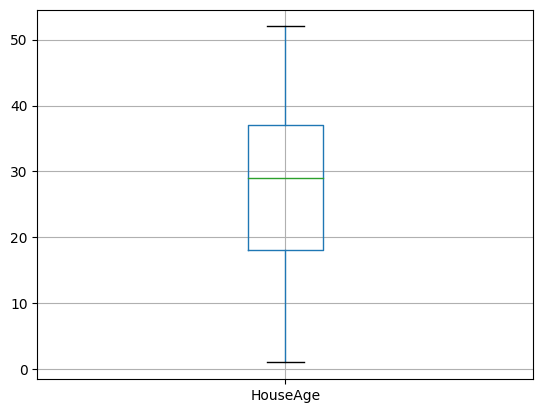

In [96]:
df.boxplot(column=["HouseAge"])

<Axes: >

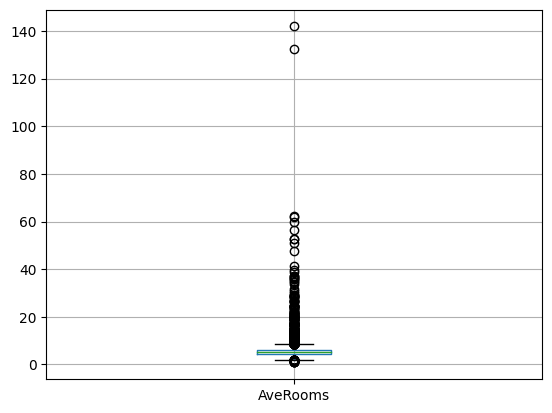

In [97]:
df.boxplot(column=["AveRooms"])

<function matplotlib.pyplot.show(close=None, block=None)>

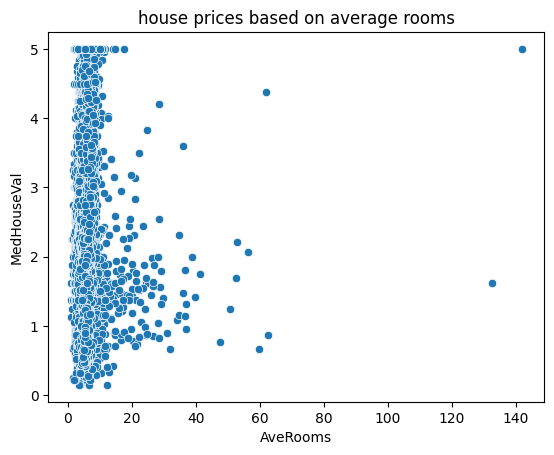

In [98]:
plt.title("house prices based on average rooms")
sns.scatterplot(x=df["AveRooms"], y=df["MedHouseVal"])
plt.show

<Axes: >

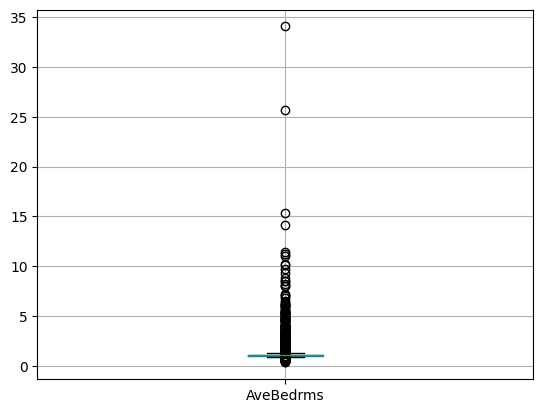

In [99]:
df.boxplot(column=["AveBedrms"])

<function matplotlib.pyplot.show(close=None, block=None)>

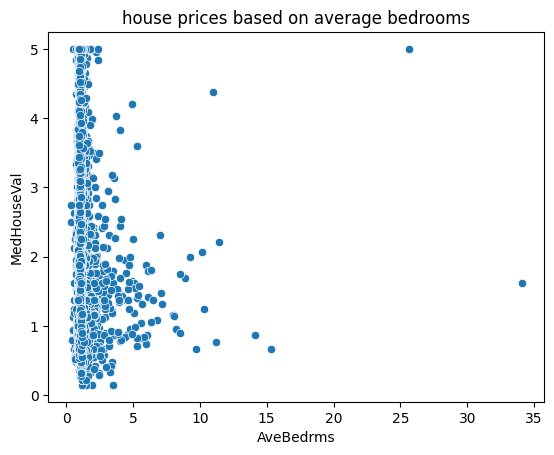

In [100]:
plt.title("house prices based on average bedrooms")
sns.scatterplot(x=df["AveBedrms"], y=df["MedHouseVal"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

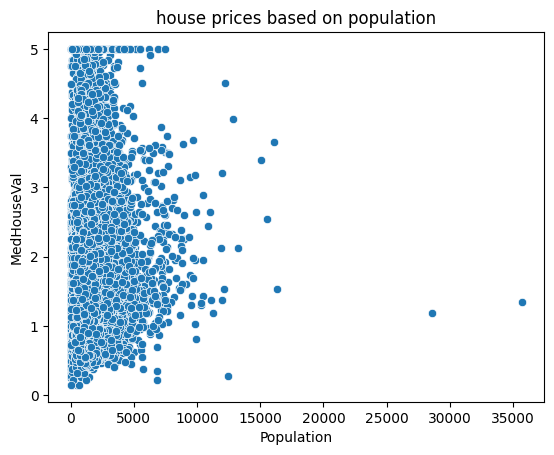

In [101]:
plt.title("house prices based on population")
sns.scatterplot(x=df["Population"], y=df["MedHouseVal"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

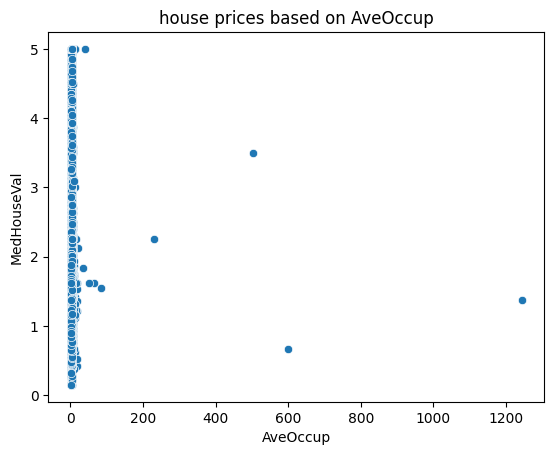

In [102]:
plt.title("house prices based on AveOccup")
sns.scatterplot(x=df["AveOccup"], y=df["MedHouseVal"])
plt.show

<Axes: >

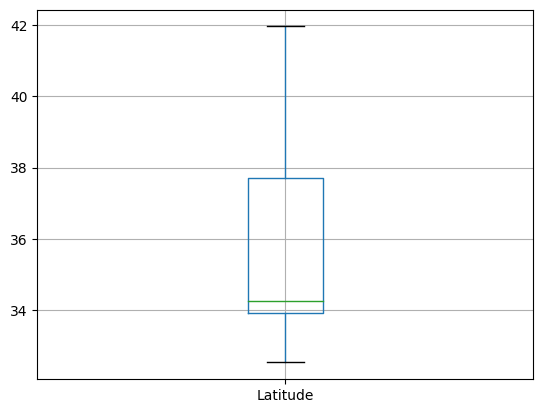

In [103]:
df.boxplot(column=["Latitude"])

<Axes: >

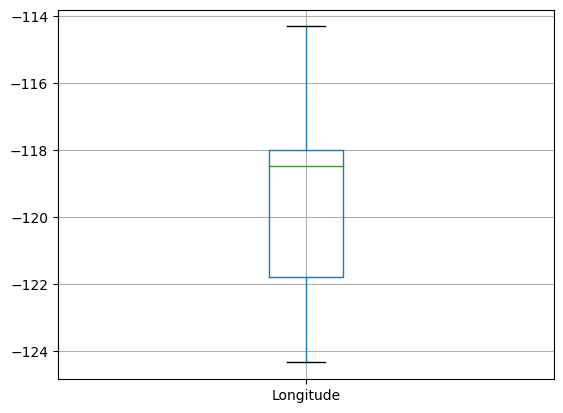

In [104]:
df.boxplot(column=["Longitude"])

<Axes: >

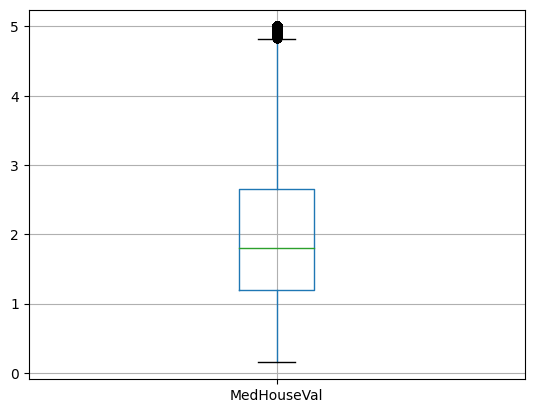

In [105]:
df.boxplot(column=["MedHouseVal"])

housing Median Age, longitiude, longitude 3개의 column을 제외한 totalRooms, totalBedrooms, population, households, medianIncome, medianHouseValue에 모두 이상치가 존재한다.

In [106]:
# 데이터 정규화

In [107]:
df[["MedInc", "AveRooms", "AveBedrms", "Population", "AveOccup"]]

,MedInc,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,6.984127,1.023810,322.0,2.555556
1,8.3014,6.238137,0.971880,2401.0,2.109842
2,7.2574,8.288136,1.073446,496.0,2.802260
3,5.6431,5.817352,1.073059,558.0,2.547945
4,3.8462,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,5.045455,1.133333,845.0,2.560606
20636,2.5568,6.114035,1.315789,356.0,3.122807
20637,1.7000,5.205543,1.120092,1007.0,2.325635
20638,1.8672,5.329513,1.171920,741.0,2.123209


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["MedInc"] = scaler.fit_transform(df[["MedInc"]])
df["AveRooms"] = scaler.fit_transform(df[["AveRooms"]])
df["AveBedrms"] = scaler.fit_transform(df[["AveBedrms"]])
df["Population"] = scaler.fit_transform(df[["Population"]])
df["AveOccup"] = scaler.fit_transform(df[["AveOccup"]])

In [109]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,41.0,0.628559,-0.153758,-0.974429,-0.049597,37.88,-122.23,4.526
1,2.332238,21.0,0.327041,-0.263336,0.861439,-0.092512,37.86,-122.22,3.585
2,1.782699,52.0,1.155620,-0.049016,-0.820777,-0.025843,37.85,-122.24,3.521
3,0.932968,52.0,0.156966,-0.049833,-0.766028,-0.050329,37.85,-122.25,3.413
4,-0.012881,52.0,0.344711,-0.032906,-0.759847,-0.085616,37.85,-122.25,3.422


### Tip: scaler 사용 방법
간단한 사용법은 아래와 같습니다. 필수사항은 아니기에 관심있으시면 공부해보시는 것을 추천드립니다.

In [ ]:
# 이를 위해 pip install scikit-learn 을 해야 할 수 있습니다.

# Z score Scaler 사용법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

# Min-Max Scaler 사용법
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입